# The Battle of Neighborhoods (Week 1 - Part 2)


## 2) Data
In this project i will be analyse only the city <b>Totoront, CA</b>.

I will be using the below datasets for analysing Totoront city

#### Dataset 1
* Neighbourhood Profiles
The Neighbourhood Profiles provide a portrait of the demographic, social and economic characteristics of the people and households in each City of Toronto neighbourhood. The data is based on tabulations of 2016 Census of Population data from Statistics Canada.<br/>
https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv

#### Dataset 2
* I using foursquare data to get information about restaurants in Toronto<br/>
Link: https://foursquare.com/explore?mode=url&ne=44.418088%2C-78.362732&q=Restaurant&sw=42.742978%2C-80.554504

#### Dataset 3
* Cultural Hotspot - Points of Interest<br/>
Cultural Hotspot spans a vast geographic area and many local neighbourhoods with unique features. This dataset contains information about points of interest for residents and visitors to enjoy including public art, murals, buildings with historic or architectural significance, green spaces, restaurants and more.<br/>
https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=csv&projection=4326

#### Reference
Toronto's Census data in publicly available at this website:<br/>
https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a

### 2.1) Download and Explore Dataset

#### Neighbourhood Profiles (Dataset 1)
In these profiles, "neighbourhood" refers to the City of Toronto's 140 social planning neighbourhoods. These social planning neighbourhoods were developed by the City of Toronto to help government and community organizations with local planning by providing socio-economic data at a meaningful geographic area. The boundaries of these social planning neighbourhoods are consistent over time, allowing for comparison between Census years. Neighbourhood level data from a variety of other sources are also available through the City's Wellbeing Toronto mapping application and here on the Open Data portal.

Each data point in this file is presented for the City's 140 neighbourhoods, as well as for the City of Toronto as a whole. The data is sourced from a number of Census tables released by Statistics Canada. The general Census Profile is the main source table for this data, but other Census tables have also been used to provide additional information.

For definitions of terms and concepts referenced in this data set, users should consult the reference materials produced by Statistics Canada for the 2016 Census, available online at:<br/>
https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a

![Dataset_1](https://github.com/mmilazzo/github-coursera/blob/master/Week%204%20Solution/image/Dataset_1.0.png "neighbourhood profiles")

####  Foursquare data about restaurants in Toronto  (Dataset 2)

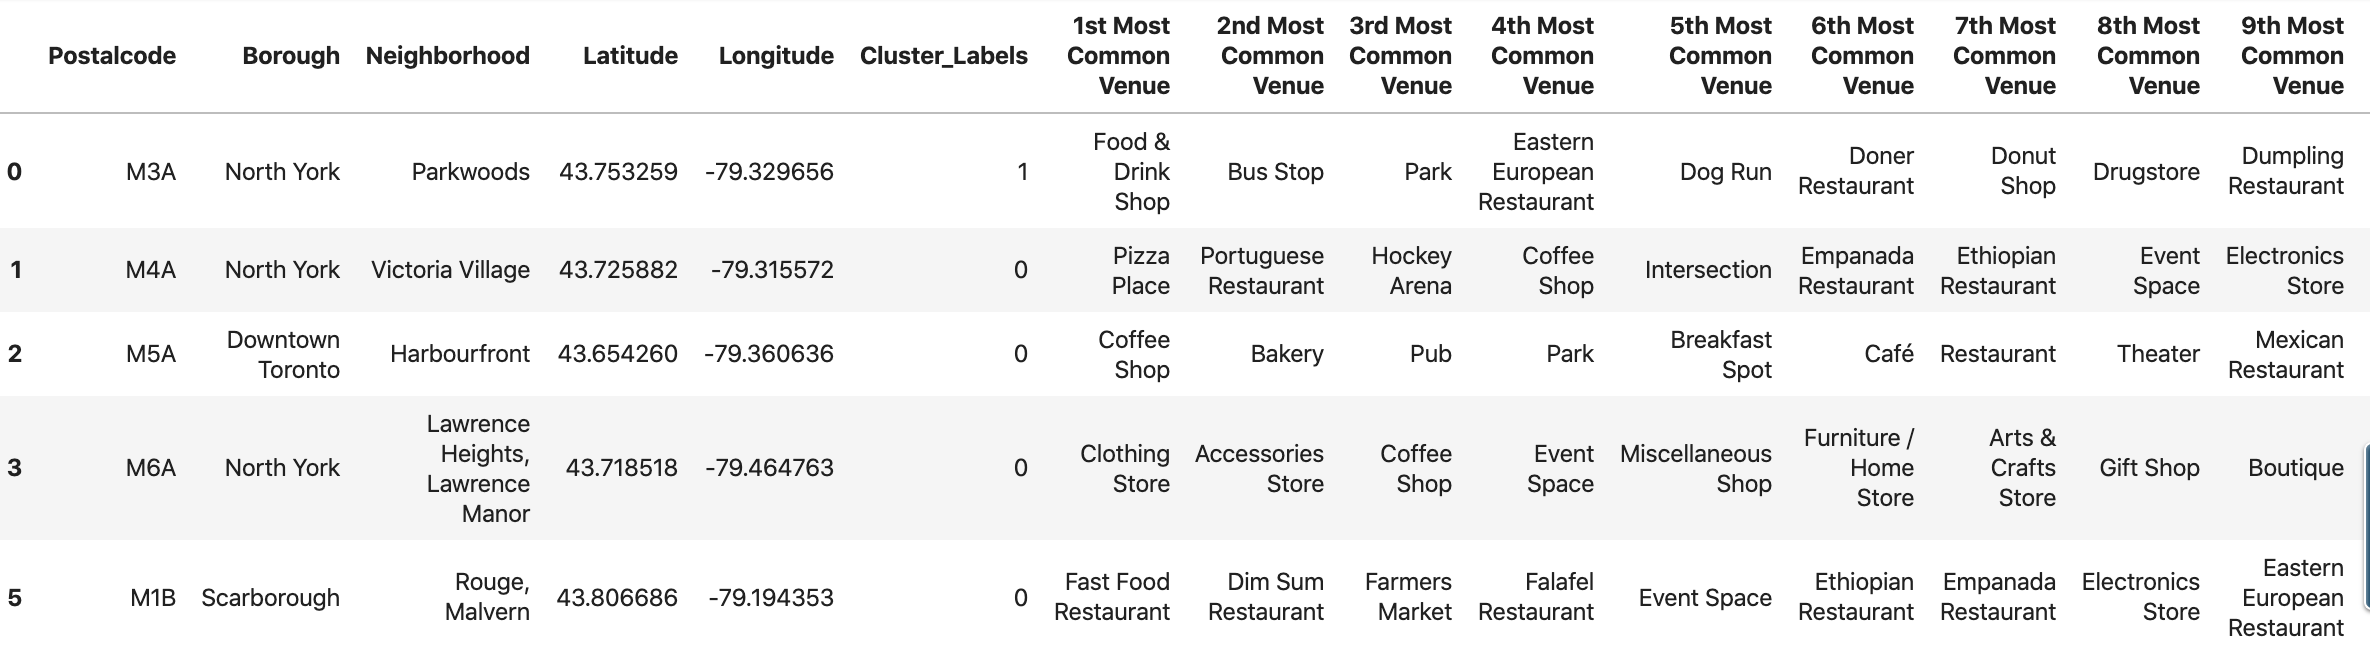

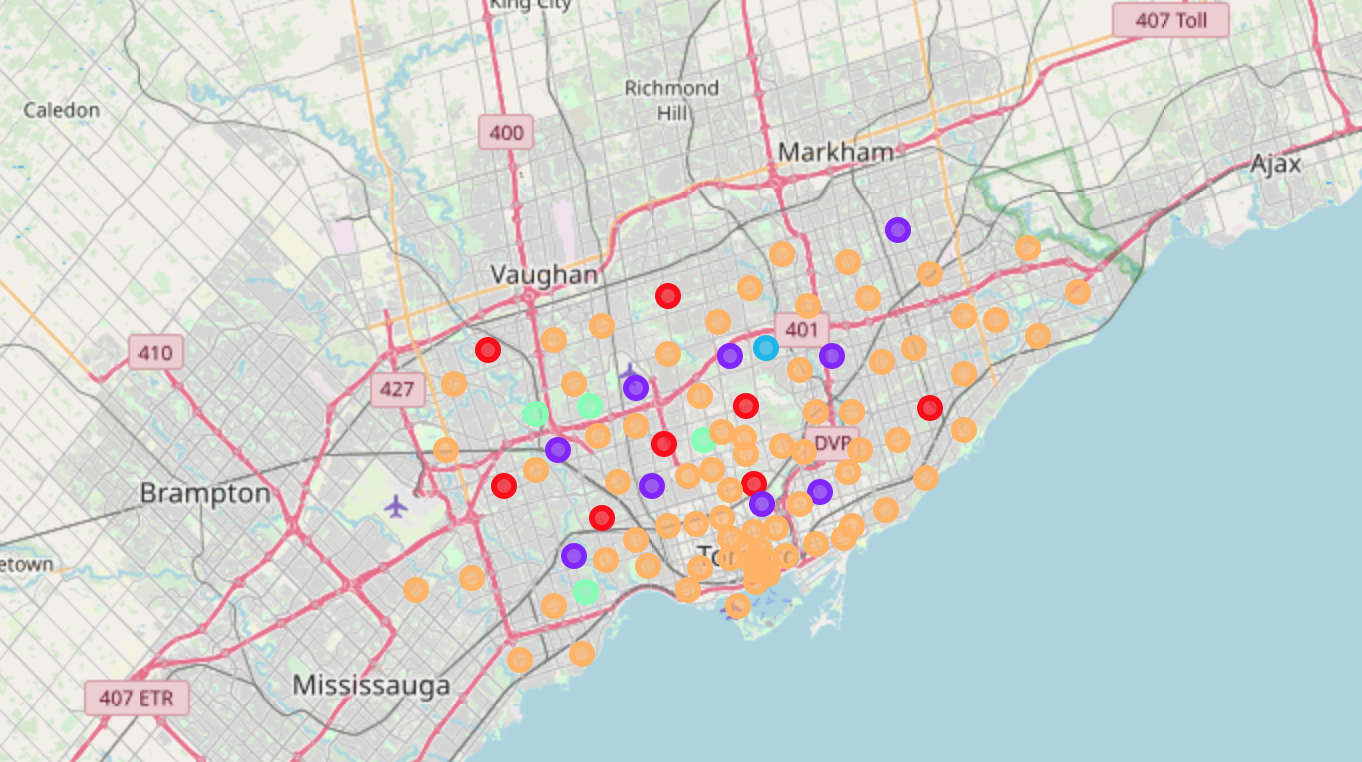

#### Cultural Hotspot - Points of Interest  (Dataset 3)

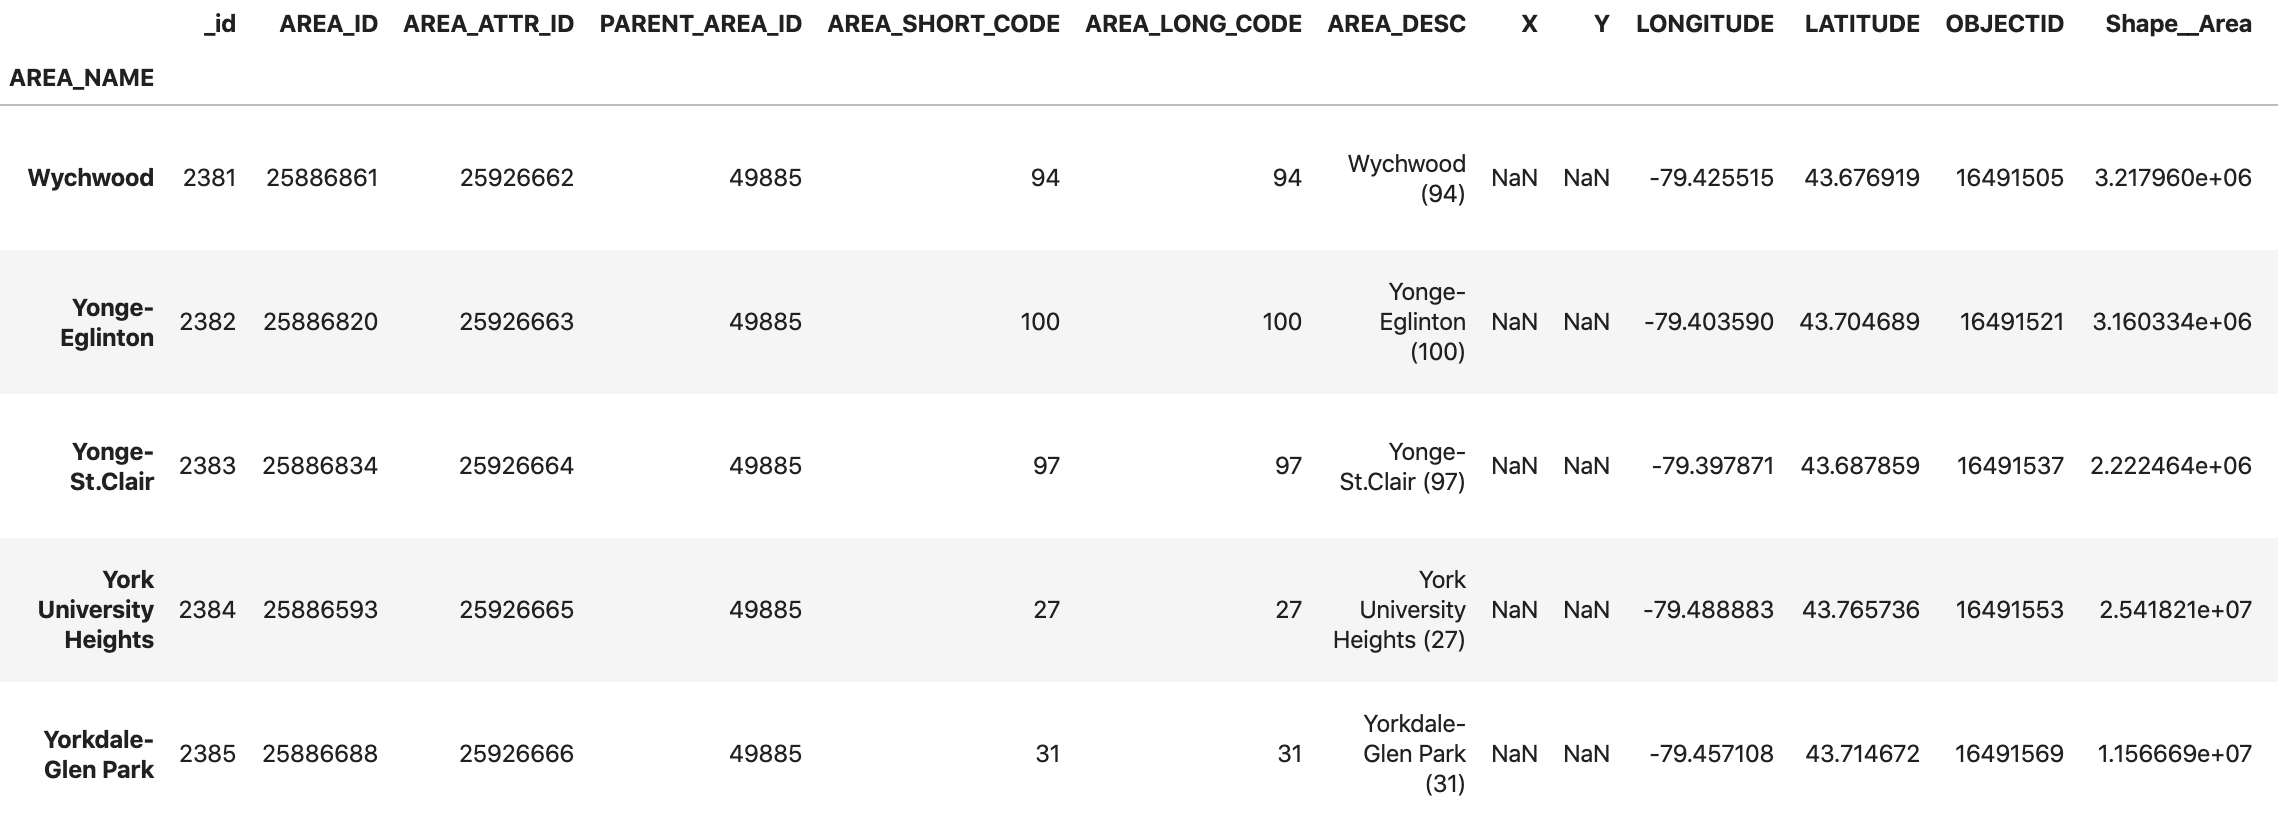